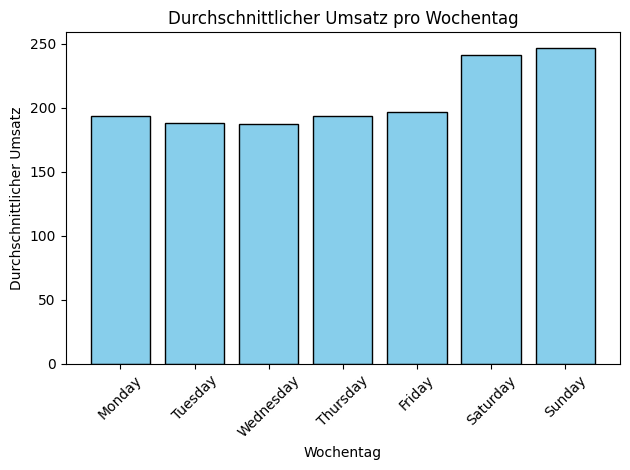

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('umsatzdaten_gekuerzt.csv')

# Let pandas infer the date format automatically
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')

# Extract weekday
df['Wochentag'] = df['Datum'].dt.day_name()

# Group by weekday and calculate average sales
avg_sales = df.groupby('Wochentag')['Umsatz'].mean()

# Sort weekdays in calendar order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sales = avg_sales.reindex(weekday_order)

# Plot
plt.bar(avg_sales.index, avg_sales.values, color='skyblue', edgecolor='black')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.title('Durchschnittlicher Umsatz pro Wochentag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

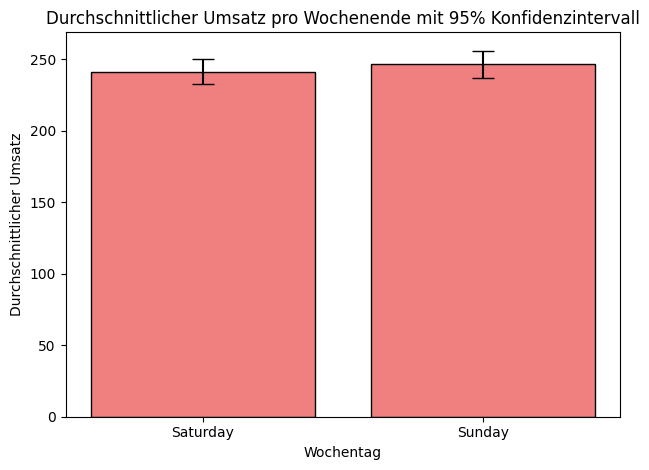

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('umsatzdaten_gekuerzt.csv')
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')
df['Wochentag'] = df['Datum'].dt.day_name()

# Filter for weekends
weekend_df = df[df['Wochentag'].isin(['Saturday', 'Sunday'])]

# Calculate mean and 95% confidence interval
weekend_stats = weekend_df.groupby('Wochentag')['Umsatz'].agg(['mean', 'count', 'std'])
weekend_stats['sem'] = weekend_stats['std'] / np.sqrt(weekend_stats['count'])
weekend_stats['ci95'] = 1.96 * weekend_stats['sem']

# Plot
plt.bar(weekend_stats.index, weekend_stats['mean'], yerr=weekend_stats['ci95'], 
        color='lightcoral', edgecolor='black', capsize=8)
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.title('Durchschnittlicher Umsatz pro Wochenende mit 95% Konfidenzintervall')
plt.tight_layout()
plt.show()

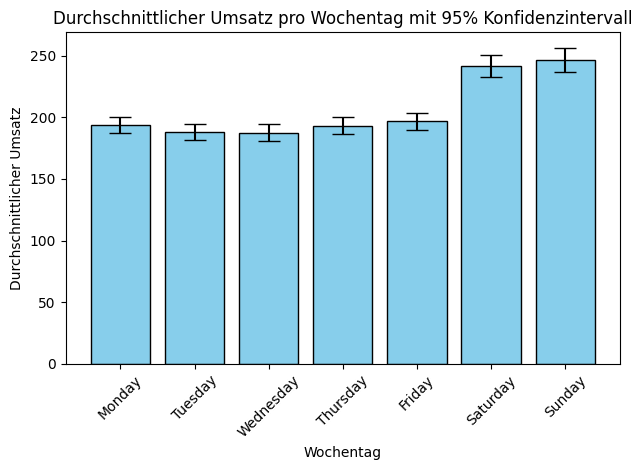

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('umsatzdaten_gekuerzt.csv')
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')
df['Wochentag'] = df['Datum'].dt.day_name()

# Calculate mean, count, std, sem, and 95% CI for each weekday
stats = df.groupby('Wochentag')['Umsatz'].agg(['mean', 'count', 'std'])
stats['sem'] = stats['std'] / np.sqrt(stats['count'])
stats['ci95'] = 1.96 * stats['sem']

# Define the correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex to ensure correct order
stats = stats.reindex(weekday_order)

# Plot bar chart with error bars
plt.bar(stats.index, stats['mean'], yerr=stats['ci95'], color='skyblue', edgecolor='black', capsize=8)
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.title('Durchschnittlicher Umsatz pro Wochentag mit 95% Konfidenzintervall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()